In [1]:
import pandas as pd

# Load the red wine data
red_wine_data = pd.read_csv('red_wine.csv')
red_wine_data.head()


,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB


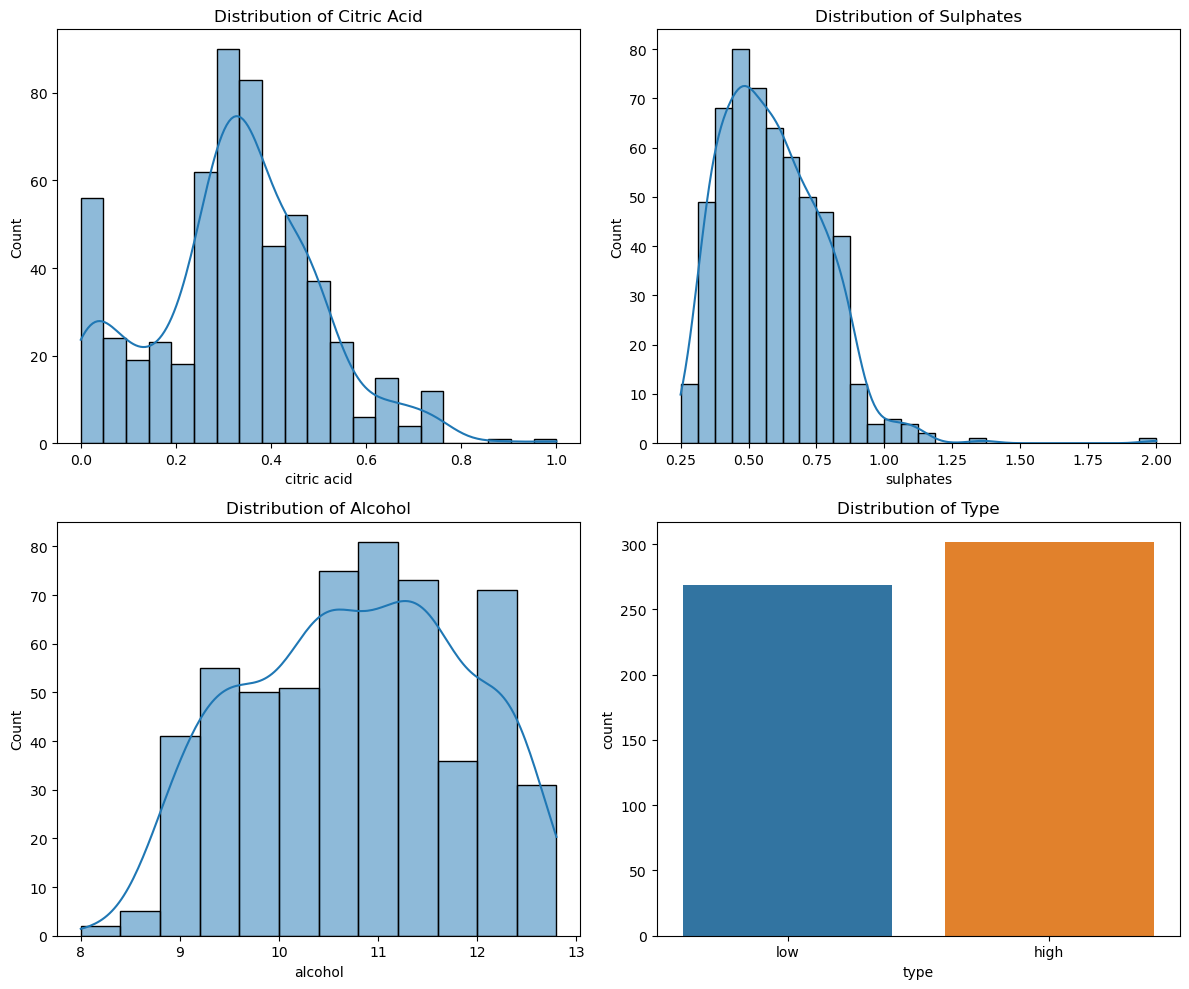

(None,
        citric acid   sulphates     alcohol
 count   571.000000  571.000000  571.000000
 mean      0.324676    0.588161   10.776883
 std       0.175103    0.188478    1.092562
 min       0.000000    0.250000    8.000000
 25%       0.240000    0.450000    9.900000
 50%       0.330000    0.570000   10.800000
 75%       0.440000    0.710000   11.600000
 max       1.000000    2.000000   12.800000)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
info = red_wine_data.info()

# Display summary statistics
summary_stats = red_wine_data.describe()

# Plot distribution of each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot distribution of citric acid
sns.histplot(red_wine_data['citric acid'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Citric Acid')

# Plot distribution of sulphates
sns.histplot(red_wine_data['sulphates'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Sulphates')

# Plot distribution of alcohol
sns.histplot(red_wine_data['alcohol'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Alcohol')

# Plot distribution of type
sns.countplot(x='type', data=red_wine_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Type')

plt.tight_layout()
plt.show()

info, summary_stats


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
red_wine_data['type'] = le.fit_transform(red_wine_data['type'])

# Split the data into features and target variable
X = red_wine_data.drop('type', axis=1)
y = red_wine_data['type']


In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Initialize models
baseline_model = DummyClassifier(strategy='most_frequent')
lr_model = LogisticRegression(random_state=0)
nb_model = GaussianNB()
svm_model = SVC(random_state=0, probability=True)
dt_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

# Dictionary to store models and their names
models = {
    'Baseline': baseline_model,
    'Logistic Regression': lr_model,
    'Naïve Bayes': nb_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Initialize scorer for cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)

# Perform 10-fold cross-validation for each model and store results
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring=roc_auc_scorer)
    results[model_name] = {
        'AUC Mean': scores.mean(),
        'AUC Std': scores.std()
    }

results


{'Baseline': {'AUC Mean': 0.5, 'AUC Std': 0.0},
 'Logistic Regression': {'AUC Mean': 0.8799019697944429,
  'AUC Std': 0.04258326826620605},
 'Naïve Bayes': {'AUC Mean': 0.8954078975584352,
  'AUC Std': 0.04580455357660366},
 'SVM': {'AUC Mean': 0.8689201360169102, 'AUC Std': 0.053040698660615324},
 'Decision Tree': {'AUC Mean': 0.7572314125539932,
  'AUC Std': 0.09436296636181697},
 'Random Forest': {'AUC Mean': 0.8929811904543087,
  'AUC Std': 0.08118719892844138}}

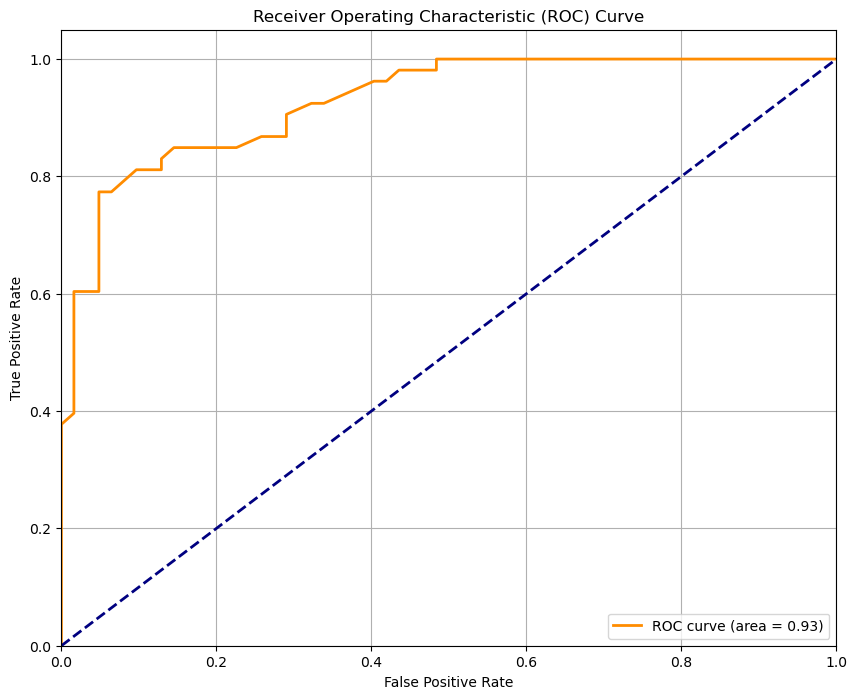

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# Predict probabilities for the test data
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [7]:
# Load the white wine data
white_wine_data = pd.read_csv('white_wine.csv')
white_wine_data.head()


,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


In [8]:
# Encode the target variable
white_wine_data['type'] = le.transform(white_wine_data['type'])

# Split the data into features and target variable
X_white = white_wine_data.drop('type', axis=1)
y_white = white_wine_data['type']

# Predict probabilities for the white wine data
y_probs_white = nb_model.fit(X, y).predict_proba(X_white)[:, 1]

# Compute AUC score
auc_score_white = roc_auc_score(y_white, y_probs_white)
auc_score_white


0.9488910318225652

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the red wine data
df = pd.read_csv('red_wine.csv')

# Generate the profile report
profile = ProfileReport(df, title='Profiling Report of Red Wine Data')

# Save the report as an HTML file
profile.to_file('red_wine_profile_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
!pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5a/14/a19d2266adf443d441be74d65e4ac12ba252c806ccf7ffdb59c7443bd846/ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/73/66/0a72c9fcde42e5650c8d8d5c5c1873b9a3893018020c77ca8eb62708b923/pydantic-2.4.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/158.6 kB ? eta -:--:--
     -------------------------------------- 158.6/158.6 kB 9.3 MB/s eta 0:00:00
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/663.4 kB ? eta -:--:--
     ------------------------------------- 663.4/663.4 kB 13.9 MB/s eta 0:00:00
  Obtaining dependency information for multimethod<2,>=1.4 from https

In [14]:
# Re-import necessary packages
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

# Reload the data
red_wine_data = pd.read_csv('red_wine.csv')

# Encode the target variable
le = LabelEncoder()
red_wine_data['type'] = le.fit_transform(red_wine_data['type'])

# Split the data into features and target variable
X = red_wine_data.drop('type', axis=1)
y = red_wine_data['type']

# Initialize models
baseline_model = DummyClassifier(strategy='most_frequent')
lr_model = LogisticRegression(random_state=0)
nb_model = GaussianNB()
svm_model = SVC(random_state=0, probability=True)
dt_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

# Dictionary to store models and their names
models = {
    'Baseline': baseline_model,
    'Logistic Regression': lr_model,
    'Naïve Bayes': nb_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Initialize scorers for cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
accuracy_scorer = make_scorer(accuracy_score)

# Perform 10-fold cross-validation for each model and store results
results_q2 = {}
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=10, scoring=roc_auc_scorer)
    accuracy_scores = cross_val_score(model, X, y, cv=10, scoring=accuracy_scorer)
    results_q2[model_name] = {
        'AUC Mean': auc_scores.mean(),
        'AUC Std': auc_scores.std(),
        'Accuracy Mean': accuracy_scores.mean(),
        'Accuracy Std': accuracy_scores.std()
    }

results_q2

# Re-import necessary packages
from sklearn.preprocessing import LabelEncoder

# Reload the data
red_wine_data = pd.read_csv('red_wine.csv')

# Encode the target variable
le = LabelEncoder()
red_wine_data['type'] = le.fit_transform(red_wine_data['type'])

# Split the data into features and target variable
X = red_wine_data.drop('type', axis=1)
y = red_wine_data['type']

# Initialize models
baseline_model = DummyClassifier(strategy='most_frequent')
lr_model = LogisticRegression(random_state=0)
nb_model = GaussianNB()
svm_model = SVC(random_state=0, probability=True)
dt_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

# Dictionary to store models and their names
models = {
    'Baseline': baseline_model,
    'Logistic Regression': lr_model,
    'Naïve Bayes': nb_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Initialize scorers for cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
accuracy_scorer = make_scorer(accuracy_score)

# Perform 10-fold cross-validation for each model and store results
results_q2 = {}
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=10, scoring=roc_auc_scorer)
    accuracy_scores = cross_val_score(model, X, y, cv=10, scoring=accuracy_scorer)
    results_q2[model_name] = {
        'AUC Mean': auc_scores.mean(),
        'AUC Std': auc_scores.std(),
        'Accuracy Mean': accuracy_scores.mean(),
        'Accuracy Std': accuracy_scores.std()
    }

results_q2


{'Baseline': {'AUC Mean': 0.5,
  'AUC Std': 0.0,
  'Accuracy Mean': 0.528886872353297,
  'Accuracy Std': 0.005553212806095927},
 'Logistic Regression': {'AUC Mean': 0.8799019697944429,
  'AUC Std': 0.04258326826620605,
  'Accuracy Mean': 0.7847852389594676,
  'Accuracy Std': 0.04635263230213612},
 'Naïve Bayes': {'AUC Mean': 0.8954078975584352,
  'AUC Std': 0.04580455357660366,
  'Accuracy Mean': 0.8216273442226255,
  'Accuracy Std': 0.0642045496713457},
 'SVM': {'AUC Mean': 0.8689201360169102,
  'AUC Std': 0.053040698660615324,
  'Accuracy Mean': 0.5358439201451907,
  'Accuracy Std': 0.013544399476868165},
 'Decision Tree': {'AUC Mean': 0.7572314125539932,
  'AUC Std': 0.09436296636181697,
  'Accuracy Mean': 0.758529945553539,
  'Accuracy Std': 0.09324758484140709},
 'Random Forest': {'AUC Mean': 0.8929811904543087,
  'AUC Std': 0.08118719892844138,
  'Accuracy Mean': 0.793557168784029,
  'Accuracy Std': 0.0929955866384878}}

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("red_wine.csv")

# Assuming the last column is the target variable (class labels) and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each classifier
results = []

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)

    results.append((name, auc, accuracy))

# Print the results
print("Classifier\tAUC\tAccuracy")
for name, auc, accuracy in results:
    print(f"{name}\t{auc:.2f}\t{accuracy:.2f}")

Classifier	AUC	Accuracy
Baseline	0.50	0.50
Logistic Regression	0.88	0.77
Naive Bayes	0.89	0.81
Decision Tree	0.80	0.80
SVM-Linear	0.88	0.77
SVM-RBF	0.87	0.50
Random Forest	0.91	0.86
